In [1]:
!pip install gluoncv

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import time
from matplotlib import pyplot as plt
import numpy as np
import mxnet as mx
from mxnet import autograd, gluon
import gluoncv as gcv
from gluoncv.utils import download, viz

In [3]:
url = 'https://apache-mxnet.s3-accelerate.amazonaws.com/gluon/dataset/pikachu/train.rec'
idx_url = 'https://apache-mxnet.s3-accelerate.amazonaws.com/gluon/dataset/pikachu/train.idx'
download(url, path='pikachu_train.rec', overwrite=False)
download(idx_url, path='pikachu_train.idx', overwrite=False)

'pikachu_train.idx'

## Load the data to a Dataset : gluoncv.data.RecordFileDetection 

label: [[309.6292  205.79944 355.75494 274.14044   0.     ]]


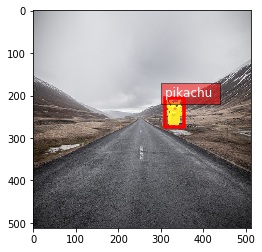

In [5]:
dataset = gcv.data.RecordFileDetection('pikachu_train.rec')
classes = ['pikachu']  # only one foreground class here
image, label = dataset[0]
print('label:', label)
# display image and label
ax = viz.plot_bbox(image, bboxes=label[:, :4], labels=label[:, 4:5], class_names=classes)
plt.show()

In [9]:
import numpy as np

class Sampler(object):
    """Base class for samplers.

    All samplers should subclass `Sampler` and define `__iter__` and `__len__`
    methods.
    """
    def __iter__(self):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError
        
class SplitSampler(Sampler):
    """Samples elements from [0, length) randomly without replacement.

    Parameters
    ----------
    length : int
        Length of the sequence.
    """
    def __init__(self, start,end):
        self._start = start
        self._end = end

    def __iter__(self):
        indices = np.arange(self._start,self._end)
        np.random.shuffle(indices)
        return iter(indices)

    def __len__(self):
        return self._end-self._start

In [10]:
train_sample=SplitSampler(0,700)
val_sample=SplitSampler(700,900)

In [ ]:
train_loader = gluon.data.DataLoader(
        dataset, batch_size, sampler= train_sample)

In [ ]:
val_loader = gluon.data.DataLoader(
        dataset, batch_size, sampler= train_sample)

### Load dataset to a Data Iterator : gluon.Data.DataLoader

### Define a Loss function : gluon.loss, gluoncv.loss

## Define neural network architecture : mx.gluon.nn, gluoncv.model_zoo

In [ ]:
net = gcv.model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', classes=classes,
    pretrained_base=False, transfer='voc')

## Define validation metric (mAP) : mx.metric, gluoncv.utils.metrics, gluoncv.utils.metrics.voc_detection

In [ ]:
Define trainer process : gluon.trainer

In [ ]:
Define training loop : epochs, mx.autograd